In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv,eig,det,eigvals
from numpy import log
import allantools
from scipy.signal import welch , periodogram
from scipy.stats import gaussian_kde

In [4]:
data = np.loadtxt('InPut/20200810.txt')
up = data[:,0]
down = data[:,1]

shotsPerEllipse = 40
finalEllipse = int(len(data)/shotsPerEllipse)

columns = ['UpInterferometerData','DownInterferometerData','Epoch', 'A', 'B' , 'C' , 'D' , 'E' , 'F' , 'x_center' , 'y_center','Orientation','Phase','x_ellipse','y_ellipse','Sigma','SigmaVariance','MaxLikelihood','Resdual']
FitEllipseData_WhiteAndRandom = pd.DataFrame(columns=columns)
FitEllipseData_WhiteAndAutoRegressive = pd.DataFrame(columns=columns)
FitEllipseData_WhiteAndFliker = pd.DataFrame(columns=columns)
FitEllipseData_White = pd.DataFrame(columns=columns)

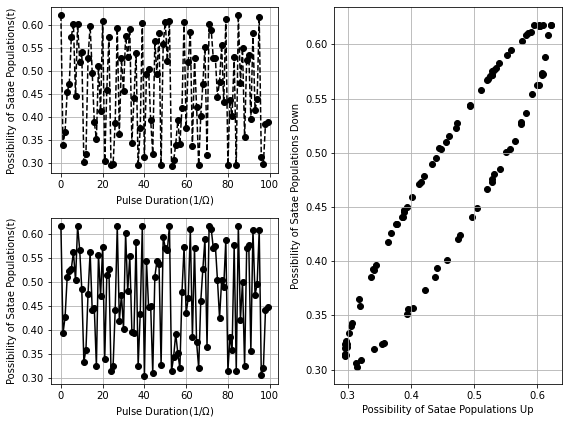

In [5]:
plt.figure(figsize=(8, 6))
# Create a 2x2 subplot layout and plot data
plt.subplot2grid((2, 2), (0, 0))  # First subplot
plt.plot(up[0:100],linestyle = '--',color = 'black',marker = 'o',markerfacecolor = 'black')
plt.grid()
plt.xlabel('Pulse Duration'+r'$(1/ \Omega)$')
plt.ylabel('Possibility of Satae Populations(t)')

plt.subplot2grid((2, 2), (1, 0))  # Second subplot
plt.plot(down[0:100],linestyle = '-',color = 'black',marker = 'o',markerfacecolor = 'black')
plt.grid()
plt.xlabel('Pulse Duration'+r'$(1/ \Omega)$')
plt.ylabel('Possibility of Satae Populations(t)')

plt.subplot2grid((2, 2), (0, 1),rowspan=2 )  # Third subplot spanning two columns
plt.scatter(up[0:100],down[0:100],color = 'black')
plt.grid()
plt.xlabel('Possibility of Satae Populations Up')
plt.ylabel('Possibility of Satae Populations Down')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('FigOutPut/figure2.png', dpi=800)